# L01: Intro

This first section is about the intro exercise. These exercises is about settings and how we can work with ML in python. By the end of this exercise we have tried out different types of models, tweeked parameters and getted to know some basic elements in machine learning. 

The data we are using is about comparing peoples life satisfaction and GDP per capita.

The first section of code unsures that the jupyter notebook is able to run no matter the version of python. Futhermore is numpy and matplotlib imported to make sure is works as well.

In [13]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # ITMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


### Code example 1-1 

In this section the data is imported, preprocessed and plotted. We are just running the codes..


In [14]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [15]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
! dir

print("\nOK")

 Volume in drive C is Windows-SSD
OK
 Volume Serial Number is C25A-EC2D

 Directory of C:\Users\thoma\OneDrive - Aarhus Universitet\MAL (Machine Learning)\MAL\ASS01

19-02-2021  11:45    <DIR>          .
19-02-2021  11:45    <DIR>          ..
16-02-2021  16:06    <DIR>          .ipynb_checkpoints
19-02-2021  11:45           131.369 ass01.ipynb
               1 File(s)        131.369 bytes
               3 Dir(s)  424.800.468.992 bytes free



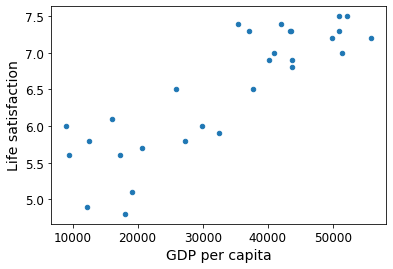

[[5.96242338]]
OK


In [16]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"ITMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

### ITMAL

The following section of code is for plotting the result of the linear regression.

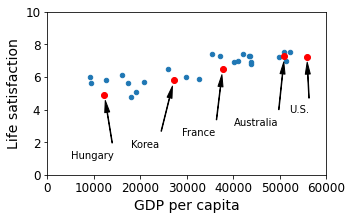

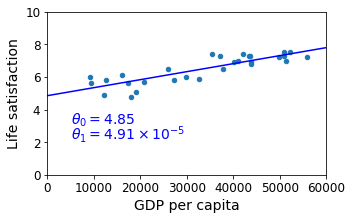

OK


In [17]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

In the above sections of code a model has been made, trained with the data and a single value has been predicted. The model is build on the concept of supervised learning, which mean when the model are trained we are supervising the model with correct answers to the data. The model is a linear regressor, which means it will predict values by a linear line as you can see in the grapha above. 

### Qa) Parameters ($\theta$) and the score ($R^2$)

**In the linear regression model there is used som parameters called $\theta$, but how can these parameters be extracted from the model via the python attributes?**

$\theta_0$ can be seen on the figure as 4.85. As the model is a linear regression this is equivalent to our value b, when the first order polynomial is in the form $y = a\cdot x + b$. Furthermore $\theta_1 = 4.91\times 10^{-5}$ is the constant a.

**When we want to evaluate the model we are trying to find a score. One kind of score is $R^2$. What will this score say about the model? What is it's maximum and minimum? Is a low or high score best?**

$R^2$ (which is used as a score for the linear regression model) describes the how good the model is at predicting the correct output based on a given input.

*What are the minimum and maximum values for $R^2~$?* <br>
The best possible score for a linear regression model to achieve is $R^2$ = 1.0. I previously believed the worst was 0.0, but the Scikit-learn documentation says that a negative $R^2$ is possible.

*Is it best to have a low $R^2$ score or a high $R^2$ score? This means, is $R^2$ a loss/cost function or a function that measures of fitness/goodness?*<br>
It is better to have a higher $R^2$ score, which makes it a function that meassure fitness/goodness. The higher the better.


In [18]:
# Code answer Qa
t0 = lin1.predict([[0]])
t1 = lin1.coef_
print(f"\u03B8_0 = {t0}, \u03B8_1 = {t1}")

score = lin1.score(X,y)

θ_0 = [[4.8530528]], θ_1 = [[4.91154459e-05]]


## k-Nearest Neighbors model

The linear reggression model is far from the only type of model we can use in ML. The next model we try out is the k-nearest neighbor. When using Scikit-learn the model can be accessed from `sklearn.neighbors.KNeighborsRegressor`.

### Qb) Using k-Nearest Neighbors
We have used Cyprus to predict. So if we use the k-nearest neighbor model insted of the linear regressor, what value will it predict?

Is the score for a k-nearest neighbor the $R^2$ as well? Can you compare scores? Is it even possible to compare any scores when doing machine learning?


X.shape= (29, 1)
y.shape= (29, 1)


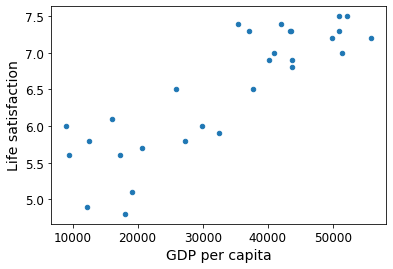

[[5.76666667]]
Score: 0.8525732853499179


In [19]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn.predict(X_new)
print(y_pred) # outputs [[ 5.77]]

# Score:
score = knn.score(X,y)
print(f"Score: {score}")

## k-Nearest Neighbors model

The linear reggression model is far from the only type of model we can use in ML. The next model we try out is the k-nearest neighbor. When using Scikit-learn the model can be accessed from `sklearn.neighbors.KNeighborsRegressor`.

### Qb) Using k-Nearest Neighbors
**We have used Cyprus to predict. So if we use the k-nearest neighbor model insted of the linear regressor, what value will it predict (it should yield =5.77)?**

As seen from the output above the knn model yields 5.77

**Is the score for a k-nearest neighbor the $R^2$ as well? Can you compare scores? Is it even possible to compare any scores when doing machine learning?**

From: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor#sklearn.neighbors.KNeighborsRegressor <br>
K-nearest neighbor model also uses $R^2$ for meassuring the score. So the two models are very comparable. 

All kinds of scoring should all be directly comparable.

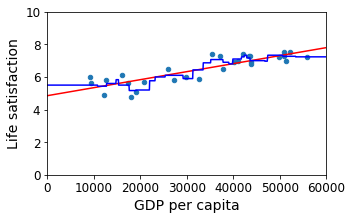

<Figure size 432x288 with 0 Axes>

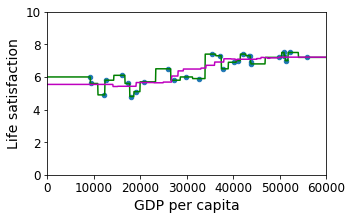

In [20]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.figure(1)
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# TODO: add your code here..
plt.figure(2)
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

knn_low_neighbor = neighbors.KNeighborsRegressor(n_neighbors=1)
knn_low_neighbor.fit(X, y)
y_pred_knn_low_neighbor = knn_low_neighbor.predict(M)
plt.plot(m, y_pred_knn_low_neighbor, "g")

knn_high_neighbor = neighbors.KNeighborsRegressor(n_neighbors=7)
knn_high_neighbor.fit(X, y)
y_pred_knn_high_neighbor = knn_high_neighbor.predict(M)
plt.plot(m, y_pred_knn_high_neighbor, "m")

### Qc) Tuning Parameters for k-Nearest Neighbors

**If we set `k_neighbor = 1` then the model produces a `score = 1`. That seems awesome, because the score tell that the model the predict perfectly. But is it really that good?**

The nearest neighbor algorithm choses the output value based on the nearest training-data values similar to our input.<br>
Since we are measuring the score based on the same data we have trained our model with, there will always be a "perfect neighbor".
This however does **not** indicate that we have made a perfect model. If the score was measured on the test data we would receive different results.


**Explain why `k_neighbor = 1` will give such a good score for the model**

It has such a good score, because we are basing the score on the training-data and therefor there will always be an exact match.



**When the model produces a `score = 1` does this mean that it would be the prefered estimator?**

Nope not at all. The model doesn't predict anything. The output value is simply the closest value to our training-data.<br>
In a theoretical scenario where we had an infinite amount of training-data containing all possible values of x and their corresponding value of y it would be a pretty good model. But then again we wouldn't need ML if that was the case. :-)


## Neural Network

Now the goal is to try out a neural network, using the same fit-predict interface as above. We should preprocess and scale the data to get any sensible output, but at first the neural networks is fit-predicted without doing any further proprocessing or scaling of the data.

Iteration 1, loss = 290434295.23044360
Iteration 2, loss = 286926974.91845930
Iteration 3, loss = 283445091.80120462
Iteration 4, loss = 279989007.88284469
Iteration 5, loss = 276559070.05886549
Iteration 6, loss = 273155609.32856679
Iteration 7, loss = 269778940.07034004
Iteration 8, loss = 266429359.38609847
Iteration 9, loss = 263107146.52031821
Iteration 10, loss = 259812562.35816020
Iteration 11, loss = 256545849.00610605
Iteration 12, loss = 253307229.45747608
Iteration 13, loss = 250096907.34413809
Iteration 14, loss = 246915066.77466321
Iteration 15, loss = 243761872.25819018
Iteration 16, loss = 240637468.71230754
Iteration 17, loss = 237541981.55239332
Iteration 18, loss = 234475516.85906243
Iteration 19, loss = 231438161.61967900
Iteration 20, loss = 228429984.03930050
Iteration 21, loss = 225451033.91592684
Iteration 22, loss = 222501343.07455081
Iteration 23, loss = 219580925.85422322
Iteration 24, loss = 216689779.64216983
Iteration 25, loss = 213827885.44891003
Iteration

Iteration 346, loss = 101994.65764525
Iteration 347, loss = 98155.11107106
Iteration 348, loss = 94451.02142945
Iteration 349, loss = 90877.98115603
Iteration 350, loss = 87431.71145899
Iteration 351, loss = 84108.05911347
Iteration 352, loss = 80902.99331520
Iteration 353, loss = 77812.60259315
Iteration 354, loss = 74833.09178088
Iteration 355, loss = 71960.77904597
Iteration 356, loss = 69192.09297732
Iteration 357, loss = 66523.56972967
Iteration 358, loss = 63951.85022503
Iteration 359, loss = 61473.67741035
Iteration 360, loss = 59085.89357102
Iteration 361, loss = 56785.43769963
Iteration 362, loss = 54569.34291936
Iteration 363, loss = 52434.73396153
Iteration 364, loss = 50378.82469664
Iteration 365, loss = 48398.91571830
Iteration 366, loss = 46492.39197945
Iteration 367, loss = 44656.72048021
Iteration 368, loss = 42889.44800671
Iteration 369, loss = 41188.19892029
Iteration 370, loss = 39550.67299630
Iteration 371, loss = 37974.64331193
Iteration 372, loss = 36457.95418232


Iteration 699, loss = 1.59090378
Iteration 700, loss = 1.59088596
Iteration 701, loss = 1.59086942
Iteration 702, loss = 1.59085409
Iteration 703, loss = 1.59083987
Iteration 704, loss = 1.59082668
Iteration 705, loss = 1.59081445
Iteration 706, loss = 1.59080311
Iteration 707, loss = 1.59079259
Iteration 708, loss = 1.59078284
Iteration 709, loss = 1.59077379
Iteration 710, loss = 1.59076541
Iteration 711, loss = 1.59075763
Iteration 712, loss = 1.59075042
Iteration 713, loss = 1.59074374
Iteration 714, loss = 1.59073754
Iteration 715, loss = 1.59073179
Iteration 716, loss = 1.59072646
Iteration 717, loss = 1.59072151
Iteration 718, loss = 1.59071692
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
MLP predict for Cyprus: [4.07671125]
MLP Score: -3.6741440524089084


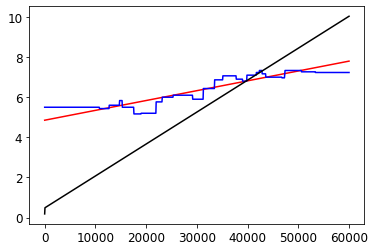

In [21]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor, can be very tricky for the tiny-data
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X,y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# TODO: add your code here..
x_cyprus = [[22587]]
y_cyprus = mlp.predict(x_cyprus)
print(f"MLP predict for Cyprus: {y_cyprus}")
score = mlp.score(X, y)
print(f"MLP Score: {score}")

### Qd) Trying Neural Network

Now we have tried to use a neural network for the ML model. The model used, is the `MLPRegressor` from Scikit-learns Multi-Layer Perceptron for regression. 

**Is it right to compare the score with the linear and KNN-scores?**

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlp#sklearn.neural_network.MLPRegressor <br>
Score returned -3.6741. It also uses $R^2$ to meassure the score, so it can be compared. The model is simply so bad that it has a negative score.

### Qe) Neural Network with pre-scaling

Now the data is scaled before training the model. We are using the interp function to scale the data from 0 to 1. 

**Is the model doing any better?**

If only the score is evaluated, then this MLP model is better with a `MLP score = 0.7254` which is significantly bad. We would still mark this model being useless. The graph below is alarming and thats makes us happy that this exercise is optional. We are not sure the the data is scaled correct.

[[0.        ]
 [0.00818087]
 [0.06812749]
 [0.07359142]
 [0.1483803 ]
 [0.17610947]
 [0.19271269]
 [0.21532867]
 [0.249786  ]
 [0.35956583]
 [0.38802504]
 [0.44516659]
 [0.50118686]
 [0.5623157 ]
 [0.59871237]
 [0.61219068]
 [0.66420375]
 [0.68323848]
 [0.70414695]
 [0.73319432]
 [0.73899437]
 [0.74158079]
 [0.74257879]
 [0.87296468]
 [0.89410502]
 [0.89639981]
 [0.90471802]
 [0.92104778]
 [1.        ]]
Iteration 1, loss = 22.67443706
Iteration 2, loss = 22.63143268
Iteration 3, loss = 22.58855719
Iteration 4, loss = 22.54576457
Iteration 5, loss = 22.50300643
Iteration 6, loss = 22.46027123
Iteration 7, loss = 22.41754827
Iteration 8, loss = 22.37483167
Iteration 9, loss = 22.33211877
Iteration 10, loss = 22.28940570
Iteration 11, loss = 22.24666552
Iteration 12, loss = 22.20392430
Iteration 13, loss = 22.16118163
Iteration 14, loss = 22.11843706
Iteration 15, loss = 22.07568844
Iteration 16, loss = 22.03293578
Iteration 17, loss = 21.99017105
Iteration 18, loss = 21.94739304
Iteratio

Iteration 337, loss = 6.97098573
Iteration 338, loss = 6.92940374
Iteration 339, loss = 6.88794107
Iteration 340, loss = 6.84659839
Iteration 341, loss = 6.80537635
Iteration 342, loss = 6.76427563
Iteration 343, loss = 6.72329687
Iteration 344, loss = 6.68244073
Iteration 345, loss = 6.64170786
Iteration 346, loss = 6.60109888
Iteration 347, loss = 6.56061445
Iteration 348, loss = 6.52025518
Iteration 349, loss = 6.48002171
Iteration 350, loss = 6.43991466
Iteration 351, loss = 6.39993463
Iteration 352, loss = 6.36008224
Iteration 353, loss = 6.32035809
Iteration 354, loss = 6.28076278
Iteration 355, loss = 6.24129688
Iteration 356, loss = 6.20196099
Iteration 357, loss = 6.16275568
Iteration 358, loss = 6.12368152
Iteration 359, loss = 6.08473907
Iteration 360, loss = 6.04592889
Iteration 361, loss = 6.00725153
Iteration 362, loss = 5.96870753
Iteration 363, loss = 5.93029741
Iteration 364, loss = 5.89202172
Iteration 365, loss = 5.85388097
Iteration 366, loss = 5.81587568
Iteration 

Iteration 699, loss = 0.38992785
Iteration 700, loss = 0.38774214
Iteration 701, loss = 0.38558575
Iteration 702, loss = 0.38345834
Iteration 703, loss = 0.38135955
Iteration 704, loss = 0.37928905
Iteration 705, loss = 0.37724649
Iteration 706, loss = 0.37523152
Iteration 707, loss = 0.37324383
Iteration 708, loss = 0.37128307
Iteration 709, loss = 0.36934892
Iteration 710, loss = 0.36744105
Iteration 711, loss = 0.36555914
Iteration 712, loss = 0.36370286
Iteration 713, loss = 0.36187191
Iteration 714, loss = 0.36006596
Iteration 715, loss = 0.35828471
Iteration 716, loss = 0.35652784
Iteration 717, loss = 0.35479506
Iteration 718, loss = 0.35308605
Iteration 719, loss = 0.35140053
Iteration 720, loss = 0.34973818
Iteration 721, loss = 0.34809872
Iteration 722, loss = 0.34648186
Iteration 723, loss = 0.34488731
Iteration 724, loss = 0.34331478
Iteration 725, loss = 0.34176399
Iteration 726, loss = 0.34023466
Iteration 727, loss = 0.33872651
Iteration 728, loss = 0.33723927
Iteration 

Iteration 1051, loss = 0.21915551
Iteration 1052, loss = 0.21903856
Iteration 1053, loss = 0.21892169
Iteration 1054, loss = 0.21880488
Iteration 1055, loss = 0.21868813
Iteration 1056, loss = 0.21857145
Iteration 1057, loss = 0.21845484
Iteration 1058, loss = 0.21833829
Iteration 1059, loss = 0.21822181
Iteration 1060, loss = 0.21810538
Iteration 1061, loss = 0.21798902
Iteration 1062, loss = 0.21787271
Iteration 1063, loss = 0.21775647
Iteration 1064, loss = 0.21764028
Iteration 1065, loss = 0.21752415
Iteration 1066, loss = 0.21740808
Iteration 1067, loss = 0.21729235
Iteration 1068, loss = 0.21717711
Iteration 1069, loss = 0.21706195
Iteration 1070, loss = 0.21694689
Iteration 1071, loss = 0.21683190
Iteration 1072, loss = 0.21671699
Iteration 1073, loss = 0.21660215
Iteration 1074, loss = 0.21648739
Iteration 1075, loss = 0.21637269
Iteration 1076, loss = 0.21625806
Iteration 1077, loss = 0.21614349
Iteration 1078, loss = 0.21602898
Iteration 1079, loss = 0.21591453
Iteration 1080

Iteration 1428, loss = 0.17823974
Iteration 1429, loss = 0.17813873
Iteration 1430, loss = 0.17803777
Iteration 1431, loss = 0.17793685
Iteration 1432, loss = 0.17783598
Iteration 1433, loss = 0.17773516
Iteration 1434, loss = 0.17763439
Iteration 1435, loss = 0.17753367
Iteration 1436, loss = 0.17743299
Iteration 1437, loss = 0.17733237
Iteration 1438, loss = 0.17723179
Iteration 1439, loss = 0.17713126
Iteration 1440, loss = 0.17703079
Iteration 1441, loss = 0.17693036
Iteration 1442, loss = 0.17682997
Iteration 1443, loss = 0.17672964
Iteration 1444, loss = 0.17662936
Iteration 1445, loss = 0.17652913
Iteration 1446, loss = 0.17642894
Iteration 1447, loss = 0.17632881
Iteration 1448, loss = 0.17622872
Iteration 1449, loss = 0.17612868
Iteration 1450, loss = 0.17602870
Iteration 1451, loss = 0.17592876
Iteration 1452, loss = 0.17582887
Iteration 1453, loss = 0.17572903
Iteration 1454, loss = 0.17562925
Iteration 1455, loss = 0.17552951
Iteration 1456, loss = 0.17542982
Iteration 1457

Iteration 1855, loss = 0.14024097
Iteration 1856, loss = 0.14016543
Iteration 1857, loss = 0.14008995
Iteration 1858, loss = 0.14001455
Iteration 1859, loss = 0.13993921
Iteration 1860, loss = 0.13986393
Iteration 1861, loss = 0.13978873
Iteration 1862, loss = 0.13971359
Iteration 1863, loss = 0.13963852
Iteration 1864, loss = 0.13956352
Iteration 1865, loss = 0.13948858
Iteration 1866, loss = 0.13941371
Iteration 1867, loss = 0.13933891
Iteration 1868, loss = 0.13926418
Iteration 1869, loss = 0.13918951
Iteration 1870, loss = 0.13911491
Iteration 1871, loss = 0.13904038
Iteration 1872, loss = 0.13896592
Iteration 1873, loss = 0.13889152
Iteration 1874, loss = 0.13881720
Iteration 1875, loss = 0.13874294
Iteration 1876, loss = 0.13866874
Iteration 1877, loss = 0.13859462
Iteration 1878, loss = 0.13852056
Iteration 1879, loss = 0.13844657
Iteration 1880, loss = 0.13837265
Iteration 1881, loss = 0.13829879
Iteration 1882, loss = 0.13822501
Iteration 1883, loss = 0.13815129
Iteration 1884

Iteration 2231, loss = 0.11663318
Iteration 2232, loss = 0.11658310
Iteration 2233, loss = 0.11653308
Iteration 2234, loss = 0.11648313
Iteration 2235, loss = 0.11643324
Iteration 2236, loss = 0.11638342
Iteration 2237, loss = 0.11633366
Iteration 2238, loss = 0.11628397
Iteration 2239, loss = 0.11623434
Iteration 2240, loss = 0.11618478
Iteration 2241, loss = 0.11613528
Iteration 2242, loss = 0.11608585
Iteration 2243, loss = 0.11603649
Iteration 2244, loss = 0.11598719
Iteration 2245, loss = 0.11593795
Iteration 2246, loss = 0.11588878
Iteration 2247, loss = 0.11583967
Iteration 2248, loss = 0.11579063
Iteration 2249, loss = 0.11574166
Iteration 2250, loss = 0.11569275
Iteration 2251, loss = 0.11564390
Iteration 2252, loss = 0.11559512
Iteration 2253, loss = 0.11554641
Iteration 2254, loss = 0.11549775
Iteration 2255, loss = 0.11544917
Iteration 2256, loss = 0.11540065
Iteration 2257, loss = 0.11535219
Iteration 2258, loss = 0.11530380
Iteration 2259, loss = 0.11525547
Iteration 2260

Iteration 2518, loss = 0.10482059
Iteration 2519, loss = 0.10478791
Iteration 2520, loss = 0.10475528
Iteration 2521, loss = 0.10472270
Iteration 2522, loss = 0.10469018
Iteration 2523, loss = 0.10465772
Iteration 2524, loss = 0.10462530
Iteration 2525, loss = 0.10459295
Iteration 2526, loss = 0.10456065
Iteration 2527, loss = 0.10452840
Iteration 2528, loss = 0.10449620
Iteration 2529, loss = 0.10446406
Iteration 2530, loss = 0.10443198
Iteration 2531, loss = 0.10439995
Iteration 2532, loss = 0.10436797
Iteration 2533, loss = 0.10433605
Iteration 2534, loss = 0.10430418
Iteration 2535, loss = 0.10427237
Iteration 2536, loss = 0.10424061
Iteration 2537, loss = 0.10420890
Iteration 2538, loss = 0.10417725
Iteration 2539, loss = 0.10414565
Iteration 2540, loss = 0.10411410
Iteration 2541, loss = 0.10408261
Iteration 2542, loss = 0.10405118
Iteration 2543, loss = 0.10401979
Iteration 2544, loss = 0.10398846
Iteration 2545, loss = 0.10395719
Iteration 2546, loss = 0.10392596
Iteration 2547

Iteration 2865, loss = 0.09642166
Iteration 2866, loss = 0.09640493
Iteration 2867, loss = 0.09638824
Iteration 2868, loss = 0.09637159
Iteration 2869, loss = 0.09635497
Iteration 2870, loss = 0.09633840
Iteration 2871, loss = 0.09632185
Iteration 2872, loss = 0.09630535
Iteration 2873, loss = 0.09628888
Iteration 2874, loss = 0.09627245
Iteration 2875, loss = 0.09625605
Iteration 2876, loss = 0.09623969
Iteration 2877, loss = 0.09622336
Iteration 2878, loss = 0.09620708
Iteration 2879, loss = 0.09619082
Iteration 2880, loss = 0.09617461
Iteration 2881, loss = 0.09615843
Iteration 2882, loss = 0.09614229
Iteration 2883, loss = 0.09612618
Iteration 2884, loss = 0.09611011
Iteration 2885, loss = 0.09609407
Iteration 2886, loss = 0.09607807
Iteration 2887, loss = 0.09606211
Iteration 2888, loss = 0.09604618
Iteration 2889, loss = 0.09603028
Iteration 2890, loss = 0.09601443
Iteration 2891, loss = 0.09599860
Iteration 2892, loss = 0.09598282
Iteration 2893, loss = 0.09596706
Iteration 2894

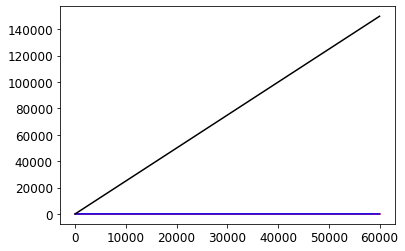

In [34]:
X = np.interp(X, (X.min(), X.max()), (0, +1))
print(X)
# Setup MLPRegressor, can be very tricky for the tiny-data
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X,y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
mld_y_pred = mlp.predict(X_new)
print(f'Prediction for Cyprus = {mld_y_pred}') # outputs [[ 5.96242338]]
print(f'MLP score = {mlp.score(X, y)}')

# L01: Modules and Classes

Morten

# L02: Cost function

Christoffer

# L02: Dummy classifier

Christoffer

# L02: Performance metrics

In this chapter we are looking at different metrics used in Machine Learning. These metrics can be called performance metric, but performance score could be a better name to capture the understanding. The metrics we will discover in this chapter is as following:

#### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

#### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

#### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### F-score

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$

#### Confusion Matrix

The confusion matrix can give a readable matrix which shows the performance of the model divided into 'actual' and 'predicted' dimensions. The following figures shows the structure of the confusion matrix.

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

If the data contain more classes, then the confusion matrix are still able to handle it. The matrix are just expanded by **N** actual classes and **N** predicted classes. 

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$

### Qa) Implement accuracy function and test

In the following code sections we are implementing the accuracy function from scratch. Then it's compared to the accuracy function from Scikit-learn imported from `sklearn.metrics`. The functions will be tested on the MNIST data, which is drawed digit from 0-9.

By comparing our own accuracy function with Scikit-learns implementation it happens that the result are equal, therefor MyAccuracy must work as supposed.

In [36]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# ----------------------SGD-------------------------
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X / 255

ground_true = (y == '5')
X_train, X_test, y_train, y_test = train_test_split(X, ground_true, test_size=0.33, random_state=1)

clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

y_pred = clf.predict(X_test)

# --------------------DUMMY-------------------------
from sklearn.base import BaseEstimator, ClassifierMixin

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return [False for _ in range(len(X))]

dc = DummyClassifier()
dc.fit(X_test, y_test)

y_predDC = dc.predict(X_test)

0.9682251082251082


In [37]:
from sklearn.metrics import accuracy_score
from numpy import fabs

# Accuracy function from scratch
def MyAccuracy(y_true, y_pred, normalize=True):
    score = 0
    for yt,yp in zip(y_true, y_pred):
        if yt == yp:
            score += 1
    return score / len(y_true) if normalize else score
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

    # do some numerical comparison here, like
    eps = 1E-9
    assert fabs(a0-a1)<eps, "MyAccuracy precission error"
        

TestAccuracy(y_test, y_pred)
TestAccuracy(y_test, y_predDC)


my a          =0.9682251082251082
scikit-learn a=0.9682251082251082

my a          =0.9085281385281385
scikit-learn a=0.9085281385281385


### Qb) Implement Precision, Recall and $F_1$-score and test

The approch of the exercise is quite similar to Qa. We implement the function to calculate precision, recall and the $F_1$-score from scratch and compare them to Scikit-learns similar functions. 

Our implemented function gives equal results to Scikit-learns functions.

To avoid dividing with zero, an if-statement simply check is it's dividing with zero. It seams like Scikit-learns functions are returning zero  when the denominator is zero as well. 

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    TP_FP = 0
    TP = 0
    for yt, yp in zip(y_true, y_pred):
        if yp:
            if yt == yp:
                TP += 1
            TP_FP += 1
    return TP/TP_FP if TP_FP != 0 else 0

def MyRecall(y_true, y_pred):
    TP = 0
    FN = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp and yp:
            TP += 1
        if yt != yp and yt:
            FN += 1
    return TP/(FN+TP)
    
def MyF1Score(y_true, y_pred):
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print("Precision SGD:")
print(MyPrecision(y_test, y_pred))
print(precision_score(y_test, y_pred))
print("Recall SGD:")
print(recall_score(y_test, y_pred))
print(MyRecall(y_test, y_pred))
print("F1 Score SGD:")
print(MyF1Score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print()
print("Precision Dummy Classifier:")
print(MyPrecision(y_test, y_predDC))
print(precision_score(y_test, y_predDC))
print("Recall Dummy Classifier:")
print(recall_score(y_test, y_predDC))
print(MyRecall(y_test, y_predDC))
print("F1 Score Dummy Classifier:")
print(MyF1Score(y_test, y_predDC))
print(f1_score(y_test, y_predDC))

Precision SGD:
0.8036107441655659
0.8036107441655659
Recall SGD:
0.8637008991954567
0.8637008991954567
F1 Score SGD:
0.8325729927007299
0.8325729927007299

Precision Dummy Classifier:
0
0.0
Recall Dummy Classifier:
0.0
0.0
F1 Score Dummy Classifier:
0
0.0


### Qc) The Confusion Matrix

Now by importing `sklearn.metrics.confusion_matrix` we can make the confusion matrix for the the earlier used Dummy and SGD classifiers. 

The printout for the code section below shows how the confusion matrix are organized. This is shown here in the following figure. 

$$   
{\bf M}\st{confusion} = 
\begin{array}{|l|ll|}
    \hline
    TN & FP \\\hline  
    FN & TP \\\hline
\end{array}
$$

If the parameters is changed when calling `confusion_matrix`, it can be seen that FP and FN has changed places. It depends on your system if this change is critical.

In [51]:
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test, y_predDC)
M_SDGwrong = confusion_matrix(y_pred, y_test)
M_SDG = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Dummy:")
print(M_dummy)
print()
print("SDG Wrong:")
print(M_SDGwrong)
print()
print("SDG:")
print(M_SDG)
print()
print("TN: " + str(tn))
print("FP: " + str(fp))
print("FN: " + str(fn))
print("TP: " + str(tp))

Dummy:
[[20987     0]
 [ 2113     0]]

SDG Wrong:
[[20541   288]
 [  446  1825]]

SDG:
[[20541   446]
 [  288  1825]]

TN: 20541
FP: 446
FN: 288
TP: 1825


### Qd) Confusion Matrix Heat-map

This heat-map is a way to visualize the confusion matrix. To make the heat-map inspiration is found in [HOML].

The data is normalized to give a heat-map which is easier to read. If not normalized, the lower values as in FP, FN and TP will barely have a different color because of TN which is significantly larger than the others. 

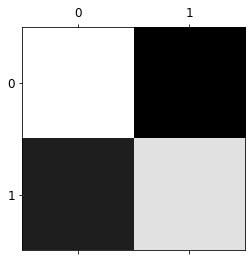

White displays high values and black displays low values
The Matrit is normalized

[True Negative]		[False Positive]
[False Negative]	[True Positve]


In [52]:
import matplotlib.pyplot as plt

row_sums = M_SDG.sum(axis=1, keepdims=True)
norm_M_SDG = M_SDG / row_sums

plt.matshow(norm_M_SDG, cmap = plt.cm.gray)
plt.show()

print("White displays high values and black displays low values")
print("The Matrit is normalized")
print()
print("[True Negative]\t\t[False Positive]")
print("[False Negative]\t[True Positve]")

### Qe) Conclusion

We have tried to make functions to calculate performance scores by ourself and how the scores shows how well the model performs. We have gained insight in how confusion matrix works and how we can apply it in futures models. We have learned that the confusion matrix will easily show the nomenclatures of the model.

# L03: Pipelines

Morten